# StudentAttendance 

Notebook to desribe the summary statistics of the student attendance rate data
* Probability distrbution of attendance rates to have a look at the overall shape of the distribution  
and to see if there are any obvious outliers
* Box plots to show the quartiles and the extremes
* Table of summary statistics

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [35]:
# open the attendance rate data and write it into a DataFrame 
attendance_file_name = "..\data\cleaned_data_schoolattendancerate.csv"
attendance_df = pd.read_csv(attendance_file_name)

## Frequency distribution of the attendance rates per year

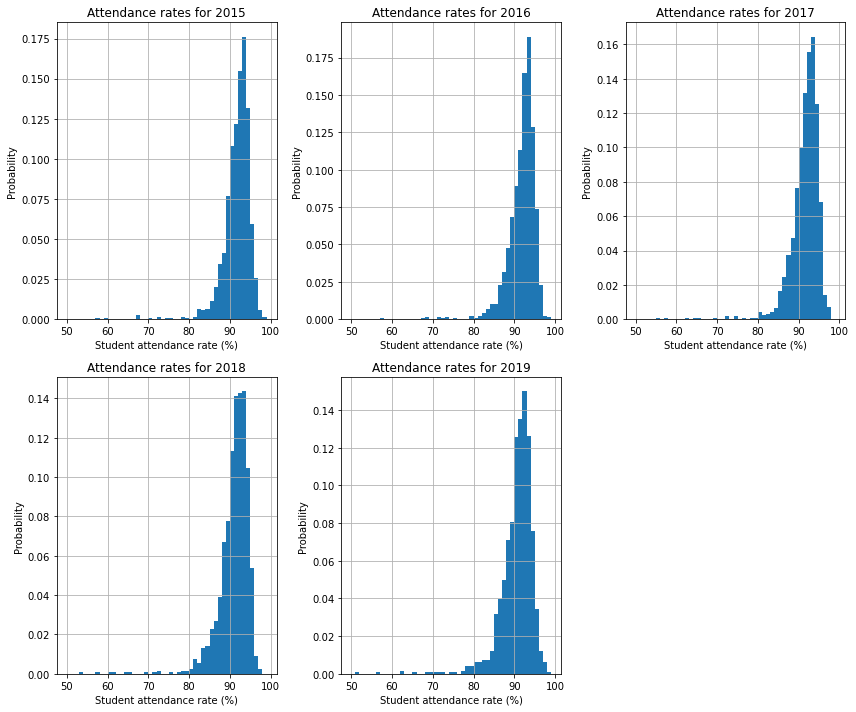

In [36]:
# loop over the years in the data and make frequency plots of the attendance rates per year

# Get the list of years in the data 
years =  attendance_df['Attendance Year'].unique()

# Make the x axis 
x = np.arange(50,100,1)

fig,axs = plt.subplots(2,3,tight_layout=True,figsize=(12,10))

irow = 0
icol = 0
for iyear in years: 
    y = attendance_df.loc[attendance_df['Attendance Year'] == iyear]['Attendance Rate']
    if icol == 3:
        irow = 1
        icol = 0
        
    axs[irow][icol].hist(y,bins=x,density=True)
    axs[irow][icol].set_xlabel('Student attendance rate (%)')
    axs[irow][icol].set_ylabel('Probability')
    axs[irow][icol].grid(True)
    title = "Attendance rates for {}".format(iyear)
    axs[irow][icol].set_title(title)
    icol += 1
    
axs[1,2].axis('off')
plt.show()

## Box and whisker plots per year

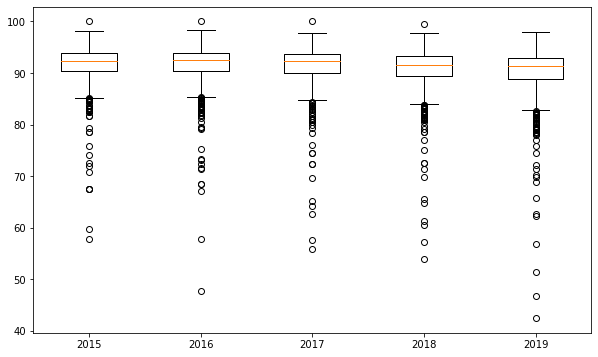

In [38]:
# loop over the years and make the boxplots 
fig,ax = plt.subplots(figsize=(10,6))
y = []
for iyear in years: 
    yt = attendance_df.loc[attendance_df['Attendance Year'] == iyear]['Attendance Rate']
    y.append(yt)

ax.boxplot(y,labels=years)
plt.show()

## Table of summary statistics per year 

In [33]:
cols = ['min', '25%', 'median', '75%', 'mean', 'std']
summary_stats_df = pd.DataFrame(columns=cols, index = years)
for iyear in years:
    yt = attendance_df.loc[attendance_df['Attendance Year'] == iyear]['Attendance Rate'] 
    summary_stats_df.loc[iyear,'min'] = min(yt)
    quartiles = yt.quantile([0.25,0.5,0.75])
    summary_stats_df.loc[iyear,'25%'] = quartiles[0.25]
    summary_stats_df.loc[iyear,'median'] = quartiles[0.5]
    summary_stats_df.loc[iyear,'75%'] = quartiles[0.75]
    summary_stats_df.loc[iyear,'max'] = max(yt)
    summary_stats_df.loc[iyear,'mean'] = yt.mean()
    summary_stats_df.loc[iyear,'std'] = yt.std()
    
summary_stats_df.style.format("{:.2f}")

,min,25%,median,75%,mean,std,max
2015,57.90,90.35,92.30,93.80,91.67,3.53,100.00
2016,47.80,90.40,92.50,93.80,91.71,3.69,100.00
2017,55.90,90.10,92.30,93.70,91.52,3.69,100.00
2018,53.90,89.50,91.65,93.30,90.94,3.95,99.50
2019,42.50,88.90,91.30,93.00,90.44,4.48,98.00


## Notes 
* There is no evidence of invalid student attendance rates in the data
* There are a small set of schools that have much lower attendance rates than the rest of the schools
* Most schools have an attendance rate of greater than 90 % 
* The is not much difference in population statistics between the years 